Pretrained Model being used regarded facial landmark detection: 
https://pypi.org/project/face-recognition/ ; https://pypi.org/project/cmake/ ; https://pypi.org/project/dlib/

Github link of the model (pretrained): https://github.com/ageitgey/face_recognition 

pillow: https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html#PIL.ImageDraw.ImageDraw.point

In [5]:
pip install cmake#prerequisite import

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install dlib#prerequisite import

  Using cached dlib-19.21.1.tar.gz (3.6 MB)
Note: you may need to restart the kernel to use updated packages.
  Created wheel for dlib: filename=dlib-19.21.1-cp38-cp38-win_amd64.whl size=3004533 sha256=b762b31678489f9c91d2f0608e51aeeb5d40d893bf5816be003c143a786a18e0
  Stored in directory: c:\users\arunasalam\appdata\local\pip\cache\wheels\f0\05\00\752b02e4ab2f6ce4633c099c0666af48ff3e4627150a500282
Successfully built dlib


In [7]:
pip install face-recognition#prerequisite import

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
Note: you may need to restart the kernel to use updated packages.


In [191]:
import face_recognition#import libraries
import cv2
import numpy as np
import os
from datetime import datetime

In [192]:
pwd#directory where image is placed..

'C:\\Users\\ARUNASALAM'

In [193]:
#setting up general variables
pictures = ((r"C:\Users\ARUNASALAM\Desktop\SAMPLE_FACIAL_DATASET"))
#pictures = list(paths.list_images(r"C:\Users\ARUNASALAM\Desktop\SAMPLE_FACIAL_DATASET"))#dataset directory
print(pictures)
print("-------------------------------------------------------")#buffer print testing
dataset = os.listdir(pictures)
print(dataset)
images = []
training_data = []
names = []

C:\Users\ARUNASALAM\Desktop\SAMPLE_FACIAL_DATASET
-------------------------------------------------------
['Aaron_Eckhart_0001.jpg', 'Aaron_Eckhart_0003.jpg', 'Abdullah_Gul_0001.jpg', 'Abdullah_Gul_0002.jpg', 'Abdullah_Gul_0003.jpg']


In [194]:
#PURPOSE: LOAD IMAGE DATASET
#size = 500, 500#standardize sizes

def trainingdata():
    try:
       for photo in dataset:
            img_array = cv2.imread(f'{pictures}/{photo}')#image data is imported as an array
            training_data.append(img_array)#append image data [as array]            
            names.append([os.path.splitext(photo)[0]])#extract image name without file extension

    except Exception as e:
            print("Something is corrupted")
        
trainingdata()

In [195]:
print(names)

[['Aaron_Eckhart_0001'], ['Aaron_Eckhart_0003'], ['Abdullah_Gul_0001'], ['Abdullah_Gul_0002'], ['Abdullah_Gul_0003']]


In [196]:
print(len(training_data))#getting the number of images processed; should be 11657 images

5


In [197]:
print(training_data[1])

[[[223 220 205]
  [223 220 205]
  [223 220 205]
  ...
  [241 251 251]
  [241 251 251]
  [241 251 251]]

 [[224 221 206]
  [224 221 206]
  [224 221 206]
  ...
  [241 251 251]
  [241 251 251]
  [241 251 251]]

 [[226 223 208]
  [226 223 208]
  [226 223 208]
  ...
  [241 251 251]
  [241 251 251]
  [241 251 251]]

 ...

 [[ 31   7   7]
  [ 32   8   8]
  [ 33   9   9]
  ...
  [ 29   8  10]
  [ 29   8  10]
  [ 29   8  10]]

 [[ 34   8   8]
  [ 33   9   9]
  [ 34  10  10]
  ...
  [ 29   8  10]
  [ 29   8  10]
  [ 29   8  10]]

 [[ 34   8   8]
  [ 35   9   9]
  [ 34  10  10]
  ...
  [ 29   8  10]
  [ 29   8  10]
  [ 29   8  10]]]


In [198]:
def encoding_images(training_data):
    try:
       encodingimages = [] 
       for img in training_data:
           img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
           encode_img = face_recognition.face_encodings(img)[0]#encoding test image
           encodingimages.append([encode_img])#add image data in np array to training_data
       return encodingimages     
    except Exception as e:
            print("Image is corrupted/SOMETHING IS WRONG")
        


In [199]:
images_encoded = encoding_images(training_data)
print("images been encoded")

In [206]:
print(len(images_encoded))#make sure it equals same number of images

5


In [216]:
capture = cv2.VideoCapture(1)
while True:
    sucess, img = capture.read()
    imgS = cv2.resize(img,(0,0),None,0.25,0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
    
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
    
    for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
        matches = face_recognition.compare_faces(images_encoded,encodeFace)
        faceDis = face_recognition.face_distance(images_encoded,encodeFace)
        print(faceDis)
        matchIndex = np.argmin(faceDis)
        
        if matches[matchIndex]:
            identification = names[matchIndex].upper()
            print(identification)
            y1,x2,y2,x1 = faceLoc
            y1,x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
            cv2.putText(img,identification,(x1+6,y2-6),cv2.FONT_HERSHET_COMPLEX,1,(255,255,255),2)
            
            
cv2.imshow('Webcam',img)
cv2.waitKey(1)
cv2.destroyAllWindows()#remove this!

[[1.08796880e-02 6.07635081e-02 5.09046484e-04 1.14115888e-01
  1.89039677e-01 1.41669050e-01 4.91210818e-03 5.34045473e-02
  5.88165522e-02 1.32340789e-02 7.20325708e-02 3.46694421e-02
  5.29925525e-02 1.43849105e-02 5.69852255e-02 3.25829983e-02
  1.77424103e-02 1.22951716e-03 6.21677712e-02 2.15832889e-02
  4.30707829e-02 2.11828817e-02 2.05877423e-02 2.88039483e-02
  2.60073319e-02 3.90505791e-03 2.44826898e-02 1.41915679e-03
  7.96436444e-02 7.94647858e-02 7.58960992e-02 4.86442177e-02
  5.97986728e-02 5.68748582e-02 2.56091347e-02 4.91939951e-02
  1.11883089e-01 5.33073507e-02 4.43859845e-02 6.04096474e-02
  5.54021746e-02 9.90799032e-02 4.52630296e-02 3.81584466e-02
  8.94706547e-02 5.83078498e-02 5.42202964e-03 4.20752913e-03
  7.37821162e-02 8.77507776e-02 6.07220829e-02 3.31547856e-03
  1.15283370e-01 8.17310810e-03 4.55559865e-02 9.47033465e-02
  5.11954632e-02 1.12793721e-01 8.04179460e-02 7.22967228e-02
  5.92265502e-02 5.52401319e-02 8.04346055e-03 7.71977380e-03
  4.0974

IndexError: list index out of range

In [35]:
#image2 = face_recognition.load_image_file("original2.jpg")#importing facial image to be tested for the pretrained model

In [13]:
#image = face_recognition.load_image_file("original.jpg")#importing facial image to be tested for the pretrained model

In [33]:
#face_encodings = face_recognition.face_encodings(image)#encoding test image

In [34]:
face_encodings[0]

array([-6.61564320e-02,  1.16884142e-01,  4.10529822e-02,  3.92648205e-02,
       -1.12397261e-01,  1.90261789e-02,  4.48729917e-02, -1.71706870e-01,
        1.32421806e-01, -1.40206486e-01,  1.73025623e-01, -2.41515096e-02,
       -2.80770630e-01,  3.57000856e-03, -6.50155693e-02,  1.28715366e-01,
       -5.75219281e-02, -1.40830681e-01, -1.69872686e-01, -1.66746438e-01,
        3.92196253e-02,  1.31993741e-01, -3.53224128e-02, -6.63068295e-02,
       -1.01232961e-01, -2.47213989e-01, -3.76411378e-02, -9.72234085e-02,
        5.29604182e-02, -8.54638740e-02,  2.97706798e-02,  8.89433548e-02,
       -1.56399161e-01, -1.85832977e-02, -3.95147949e-02,  3.73884588e-02,
       -1.09107137e-01, -5.93163259e-02,  1.67087913e-01,  4.92532738e-03,
       -1.86469093e-01,  3.59635875e-02,  4.09595966e-02,  2.69907683e-01,
        1.90858036e-01, -8.59867036e-02,  3.38192359e-02, -1.00976124e-01,
        3.89240049e-02, -2.16677621e-01,  5.14511950e-03,  1.35988802e-01,
        1.38051167e-01,  

In [14]:
face_locations = face_recognition.face_locations(image)#function to detect faces from an inputted image

In [15]:
print(face_locations)#coordinates of face detected 

[(354, 1389, 1020, 724)]


In [16]:
face_landmarks_list = face_recognition.face_landmarks(image)#function to detect facial variables from an inputted image

In [17]:
print(face_landmarks_list)
#prints detected coordinates, the library also labels what the coordinates are related to (ex. chin: (x,y,z))

[{'chin': [(689, 600), (710, 681), (735, 758), (760, 837), (791, 908), (844, 963), (922, 1000), (1008, 1022), (1085, 1022), (1157, 1002), (1214, 962), (1265, 912), (1296, 846), (1310, 771), (1308, 689), (1309, 608), (1303, 527)], 'left_eyebrow': [(749, 535), (778, 471), (841, 437), (914, 430), (986, 443)], 'right_eyebrow': [(1081, 434), (1138, 405), (1201, 390), (1263, 401), (1304, 447)], 'nose_bridge': [(1035, 510), (1041, 557), (1047, 599), (1053, 647)], 'nose_tip': [(998, 715), (1029, 714), (1061, 713), (1090, 703), (1119, 697)], 'left_eye': [(836, 562), (867, 539), (908, 530), (950, 551), (913, 562), (873, 568)], 'right_eye': [(1125, 523), (1152, 493), (1192, 486), (1229, 498), (1202, 519), (1162, 524)], 'top_lip': [(960, 850), (1001, 824), (1043, 803), (1070, 804), (1090, 795), (1136, 800), (1183, 813), (1168, 816), (1095, 811), (1073, 821), (1046, 821), (983, 845)], 'bottom_lip': [(1183, 813), (1147, 848), (1107, 866), (1084, 875), (1057, 878), (1010, 872), (960, 850), (983, 845)

In [18]:
import pickle#save image array data

pickle_out = open("facial_image.pickle","wb")#file outputted (saved to, located in my file directory)
pickle.dump(face_landmarks_list, pickle_out)
pickle_out.close()

In [19]:
pickle_in = open("facial_image.pickle","rb")#loading the saved image array data now stored in directory
face_landmarks_list = pickle.load(pickle_in)

In [20]:
import cv2#need to display image
from PIL import Image, ImageDraw, ImageFont#need to display image
import matplotlib.pyplot as plt#need to display image

In [21]:
pil_image = Image.fromarray(image)#convert array to image

In [22]:
print(pil_image)#comfirming image array conversion to PIL IMAGE

<PIL.Image.Image image mode=RGB size=1920x1212 at 0x1C0D8274AC0>


In [23]:
createimage = ImageDraw.Draw(pil_image)#create new image

In [24]:
for face_landmarks in face_landmarks_list:#draw lines to visually represent facial coordinates earlier printed onto image

    # facial features detected are now traced with a line via pillow drawing
    for facial_feature in face_landmarks.keys():
         createimage.line(face_landmarks[facial_feature], width=50, fill='black')


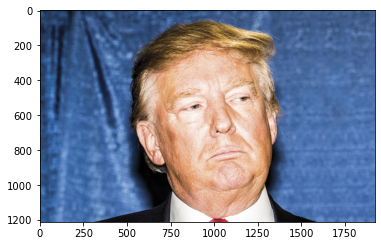

In [25]:
plt.imshow(image)#ORIGINAL IMAGE

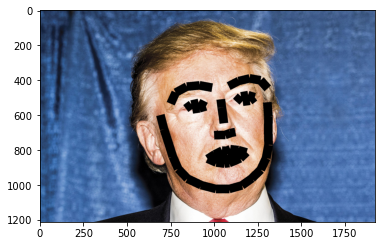

In [26]:
plt.imshow(pil_image)#WHITE LINES DISPLAY FACIAL FEATURE OUTLINES

The pretrained model accurately captures facial features of the submitted photo. 

In [27]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('Trump',image)
cv2.waitKey(0)
cv2.destroyAllWindows()